# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape


(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

In [5]:
missing_values_count = df.isnull().sum()
missing_values_count

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [6]:
# fill missing values with the median - Most frequent value
df.normalized_losses.fillna(df.normalized_losses.median(), inplace=True)
df.bore.fillna(df.bore.median(), inplace=True)
df.stroke.fillna(df.stroke.median(), inplace=True)
df.horsepower.fillna(df.horsepower.median(), inplace=True)
df.peak_rpm.fillna(df.peak_rpm.median(), inplace=True)
df.price.fillna(df.price.median(), inplace=True)

In [7]:
#num_doors is a categorical feature
df.num_doors.fillna("two", inplace=True)

In [8]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

De acuerdo con los resultados anteriores se evidencia que se lograron eliminar todos los missing values

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

In [9]:
#Use only nominal features

nom_df = df.select_dtypes(exclude=['object']).copy()
nom_df.head(5)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [10]:
#split dataset into train and test
from sklearn.model_selection import train_test_split

X = nom_df.drop(['price'], axis=1)
y = nom_df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [12]:
pd.Series(cross_val_score(rf, X, y, cv=5, scoring='accuracy')).describe()

count    5.000000
mean     0.457527
std      0.504297
min      0.000000
25%      0.037634
50%      0.250000
75%      1.000000
max      1.000000
dtype: float64

In [13]:
rmse1 = sqrt(mean_squared_error(y_test, y_pred1))
rmse1

3832.635651671254

## Tuning n_estimators

In [14]:
# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rf2 = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(rf2, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

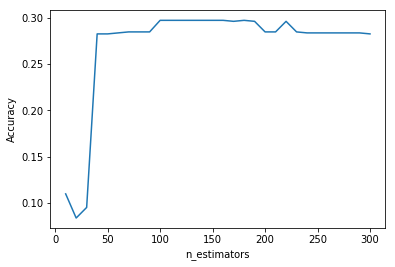

In [15]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [16]:
#  n_estimators=100 is sufficiently large
rf3 = RandomForestClassifier(n_estimators=100,  random_state=1, n_jobs=-1)
rf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [17]:
y_pred3 = rf3.predict(X_test)
metrics.accuracy_score(y_pred3, y_test)

0.07692307692307693

In [18]:
rmse2 = sqrt(mean_squared_error(y_test, y_pred3))
rmse2

2839.122582500012

In [19]:
pd.Series(cross_val_score(rf3, X, y, cv=5, scoring='accuracy')).describe()

count    5.000000
mean     0.297177
std      0.433640
min      0.000000
25%      0.000000
50%      0.048387
75%      0.437500
max      1.000000
dtype: float64

# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

In [20]:
n2_df = pd.DataFrame(data=pd.get_dummies(obj_df))

n2_df.shape

(205, 60)

In [21]:
df_price = pd.DataFrame(data=df.price)

In [22]:
New = n2_df.merge(df_price, left_index = True, right_index = True)

New.head(5)

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,num_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi,price
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13495.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16500.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16500.0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13950.0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,17450.0


In [23]:
X2 = New.drop(['price'], axis=1)
y2 = New.price

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

In [24]:
rf4 = RandomForestClassifier()
rf4.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred4 = rf4.predict(X_test2)
metrics.accuracy_score(y_pred4, y_test2)

0.038461538461538464

In [26]:
rmse3 = sqrt(mean_squared_error(y_test2, y_pred4))
rmse3

4663.411364837152

In [27]:
pd.Series(cross_val_score(rf4, X2, y2, cv=5, scoring='accuracy')).describe()

count    5.000000
mean     0.206452
std      0.443827
min      0.000000
25%      0.000000
50%      0.000000
75%      0.032258
max      1.000000
dtype: float64

De acuerdo con los resultados anteriores, se evidencia que la precisión mejora significativamente, entre el modelo que emplea solo las variables numéricas y el modelo que solo usa las variables categóricas convertidas en dummies. Se pasa de un promedio de precisión de 29.7% a un promedio de 43.0%. Sin embargo, el RMSE aumentó de 2839.12 a 3986.45, por lo cuual, ahora proponemos unir las variables de los dos modelos para evaluar el resultado.

In [28]:
#New es el dataset con las variables binarias y X es el dataset con las variables dummies sin inlcuir el precio
New2 = New.merge(X, left_index = True, right_index = True)

New2.head(5)

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,1,0,0,0,0,0,0,0,0,0,...,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,0,0,0,0,0,0,0,0,0,...,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,0,0,0,0,0,0,0,0,0,...,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,0,1,0,0,0,0,0,0,0,0,...,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,0,1,0,0,0,0,0,0,0,0,...,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [29]:
X3 = New2.drop(['price'], axis=1)
y3 = New2.price

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=1)

In [30]:
rf5 = RandomForestClassifier(n_estimators=200,  random_state=1, n_jobs=-1)
rf5.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [31]:
y_pred5 = rf5.predict(X_test3)
metrics.accuracy_score(y_pred5, y_test3)

0.09615384615384616

In [32]:
rmse4 = sqrt(mean_squared_error(y_test3, y_pred5))
rmse4

2459.926937626713

In [33]:
pd.Series(cross_val_score(rf5, X3, y3, cv=5, scoring='accuracy')).describe()

count    5.000000
mean     0.486828
std      0.489672
min      0.000000
25%      0.059140
50%      0.375000
75%      1.000000
max      1.000000
dtype: float64

Se evidencia un pequeño aumento en el promedio de la precisión para este modelo. Pasamos de 43.0% a 48.6%, sin embargo, continuamos con un modelo con poca precisión. De igual forma, se evidencia una reducción del RMSE, alcanzando un valore de 2459.92. Con base en esto, planteamos un tratamiento diferente para las variables categóricas.

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

In [34]:
!pip install category_encoders

In [35]:
import category_encoders as ce

In [36]:
#Vamos a emplear el método Binary encoder

X_ = ce.BinaryEncoder().fit_transform(obj_df)
X_.head(5)                                  

,make_0,make_1,make_2,make_3,make_4,make_5,fuel_type_0,fuel_type_1,aspiration_0,aspiration_1,...,engine_type_2,engine_type_3,num_cylinders_0,num_cylinders_1,num_cylinders_2,num_cylinders_3,fuel_system_0,fuel_system_1,fuel_system_2,fuel_system_3
0,0,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,1,0,1,...,1,1,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,1,0,1,...,1,1,0,0,1,1,0,0,0,1


In [37]:
#Ahora unimos el dataset con las variables binarias
New3 = nom_df.merge(X_, left_index = True, right_index = True)

New3.head(5)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,engine_type_2,engine_type_3,num_cylinders_0,num_cylinders_1,num_cylinders_2,num_cylinders_3,fuel_system_0,fuel_system_1,fuel_system_2,fuel_system_3
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,1,0,0,0,1
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,1,0,0,0,1
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,1,0,0,0,0,1
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,1,0,0,0,1,0,0,0,1
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,0,0,1,1,0,0,0,1


In [38]:
X4 = New3.drop(['price'], axis=1)
y4 = New3.price

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state=1)

In [39]:
rf6 = RandomForestClassifier(n_estimators=100,  random_state=1, n_jobs=-1)
rf6.fit(X_train4, y_train4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
y_pred6 = rf6.predict(X_test4)
metrics.accuracy_score(y_pred4, y_test4)

0.038461538461538464

In [41]:
rmse5 = sqrt(mean_squared_error(y_test4, y_pred6))
rmse5

2583.9749083385227

In [42]:
pd.Series(cross_val_score(rf6, X4, y4, cv=5, scoring='accuracy')).describe()

count    5.000000
mean     0.308602
std      0.440362
min      0.000000
25%      0.000000
50%      0.043011
75%      0.500000
max      1.000000
dtype: float64

In [43]:
#Ahora probamos con el metodo ordinal
X_2 = ce.OrdinalEncoder().fit_transform(obj_df)

In [44]:
#Ahora unimos el dataset con las variables binarias
New4 = nom_df.merge(X_2, left_index = True, right_index = True)

New4.head(5)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,1,1,1,1,1,1,1,1,1
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,1,1,1,1,1,1,1,1,1
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,1,1,1,2,1,1,2,2,1
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,2,1,1,2,3,2,1,3,1,1
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,2,1,1,2,3,3,1,3,3,1


In [45]:
X5 = New4.drop(['price'], axis=1)
y5 = New4.price

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, random_state=1)

In [46]:
rf7 = RandomForestClassifier(n_estimators=300,  random_state=1, n_jobs=-1)
rf7.fit(X_train5, y_train5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [47]:
y_pred7 = rf7.predict(X_test5)
metrics.accuracy_score(y_pred5, y_test5)

0.09615384615384616

In [48]:
rmse6 = sqrt(mean_squared_error(y_test5, y_pred7))
rmse6

2455.7217057626553

In [49]:
pd.Series(cross_val_score(rf7, X5, y5, cv=5, scoring='accuracy')).describe()

count    5.000000
mean     0.295027
std      0.435206
min      0.000000
25%      0.000000
50%      0.037634
75%      0.437500
max      1.000000
dtype: float64

In [50]:
d = {'Model': ['nominal', 'categorical', 'nominal+categorial', 'Binary', 'Ordinal'],'RMSE': [rmse2,rmse3,rmse4,rmse5,rmse6]}
res= pd.DataFrame(data=d)
res

,Model,RMSE
0,nominal,2839.122583
1,categorical,4663.411365
2,nominal+categorial,2459.926938
3,Binary,2583.974908
4,Ordinal,2455.721706


Si evalúamos todos los modelos construidos a la luz del RMSE, encontramos que el modelo con mejor desempeño es el modelo en donde se realiza el tratamiento ordinal para las variables categóricas y se une con las variables continuas, con un valor de 2455.72, mientras que el modelo con el peor desempeño fue el modelo donde se contempla únicamente la transformación en dummies de las variables categóricas con un valor de 4663.41. 
Como conclusión, vemos que la presencia de las variables categóricas y continuas en un mismo modelo mejoran significativamente el valor del RMSE. De igual forma, vemos que los distintos tratamientos que damos a las variables categóricas marcan diferentes sustanciales en los resultados. Para este caso, el mejor resultado se obtuvo con la transformación ordinal, sin mebargo, esto no indica que este sea el mejor tratamiento en todos los casos. Se recomienda siempre evaluar el desempeño y poder compararlo tal como lo presentamos en la tabla anterior. 